In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("./xlsx/시차상관분석6Data.xlsx",index_col=0)
df = df.set_index("DateTime")

# 대비 계산
df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['스왑포인트_1M'] = df['M1_스왑포인트']/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

In [2]:
df.rename({ '1Y_전일비_irs' : '대비_irs_1Y', '2Y_전일비_irs' :'대비_irs_2Y','3Y_전일비_irs':'대비_irs_3Y', '5Y_전일비_irs' : '대비_irs_5Y', '10Y_전일비_irs' : '대비_irs_10Y',
           '1Y_전일비_crs' :'대비_crs_1Y', '2Y_전일비_crs' :'대비_crs_2Y','3Y_전일비_crs' : '대비_crs_3Y', '5Y_전일비_crs' :'대비_crs_5Y', '10Y_전일비_crs' : '대비_crs_10Y','전일비_ndf' :'대비_ndf'}, axis=1, inplace=True)


# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y','대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]]  

# 결측치 제거
df_1 = df_1.dropna() 

In [3]:
x = df_1[[   '대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '스왑포인트_1M', '전일종가_ex', 
           '종가_NDF_차이']]
y = df_1[['종가_ex']]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_39676\1515266135.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.731938,-0.562641,-0.628439,-0.403644,-0.205379,-0.364044,-0.462614,-1.872301,-3.114970,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.125961,1.820638,-0.056282,-1.367171
2012-08-06,0.559997,0.481950,0.370979,0.415773,0.202253,-0.003127,-0.602217,-0.690720,-0.939235,-0.832887,0.563092,0.159979,0.000440,-0.000209,0.107313,0.123726,1.820638,-0.000487,1.602437
2012-08-07,0.278366,-0.003605,-0.002469,0.206931,0.404219,0.401378,0.350478,-0.006403,-1.639035,-1.662735,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.125961,1.911215,-0.104877,0.117633
2012-08-08,0.278366,0.481950,0.370979,0.415773,0.606184,0.199126,-0.006783,-0.006403,-0.472702,-0.832887,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.125961,1.820638,-0.108476,-0.224108
2012-08-09,1.404890,1.453061,1.117875,1.042301,0.808150,1.817145,0.945913,0.906019,0.926898,0.826810,2.825583,0.966767,1.351270,1.284529,0.432293,0.747946,1.775350,-0.117475,-0.872236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.945827,-1.309537,-1.881494,-2.221333,-1.621146,-2.150347,-1.603142,-2.572101,-2.285122,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.625337,-0.896666,3.206786,0.860035
2022-07-26,-0.284897,-0.489161,-0.562641,-0.628439,-0.605609,0.199126,-0.721304,-0.690720,-0.472702,-0.417963,0.563092,-0.485451,-0.539892,-0.771052,0.107313,-0.001117,-0.987243,3.219385,0.753978
2022-07-27,-0.284897,-1.217494,-1.122813,-1.254966,-1.211506,0.199126,-0.244957,-0.234509,-0.239435,-0.210501,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,-0.125961,-0.851378,3.109596,-0.565848


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.964580   대비_irs_1Y
1    19.502449   대비_irs_2Y
2     2.661826   대비_irs_3Y
3     6.470297   대비_irs_5Y
4     5.880238  대비_irs_10Y
5     2.664764   대비_crs_1Y
6     5.270514   대비_crs_2Y
7     3.830959   대비_crs_3Y
8     6.695253   대비_crs_5Y
9     3.715456  대비_crs_10Y
10    1.925781    대비_국고_1Y
11    1.254070    대비_국고_3Y
12    6.296735    대비_국고_5Y
13    5.056374   대비_국고_10Y
14    1.025198    대비_통안_1Y
15    1.115798    대비_통안_2Y
16    1.247610    스왑포인트_1M
17    1.193057     전일종가_ex
18    1.162046   종가_NDF_차이


In [5]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:48:11   Log-Likelihood:                -6904.7
No. Observations:                2458   AIC:                         1.385e+04
Df Residuals:                    2438   BIC:                         1.397e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.0354      0.257      0.138      0.890      -0.468       0.539
대비_irs_2Y      0.4300      0.359      1.197      0.231      -0.274       1.134
대비_irs_3Y      0.0613      0.133      0.462      0.644      -0.199       0.322
대비_irs_5Y     -0.0227      0.207     -0.110      0.912      -0.428       0.383
대비_irs_10Y    -0.5235      0.197     -2.655      0.008      -0.910      -0.137
대비_crs_1Y     -0.6887      0.133     -5.188      0.000      -0.949      -0.428
대비_crs_2Y      0.0541      0.187      0.290      0.772      -0.312       0.420
대비_crs_3Y     -0.2979      0.159     -1.871      0.061      -0.610       0.014
대비_crs_5Y     -0.3142      0.210     -1.493      0.135      -0.727       0.098
대비_crs_10Y     0.1138      0.157      0.726      0.468      -0.194       0.421
대비_국고_1Y      -0.0134      0.113     -0.119      0.905      -0.235       0.208
대비_국고_3Y      -0.1731      0.091     -1.900      0.057      -0.352       0.006
대비_국고_5Y       0.2580      0.204      1.264      0.206      -0.142       0.658
대비_국고_10Y     -0.0076      0.183     -0.041      0.967      -0.366       0.351
대비_통안_1Y      -0.0047      0.082     -0.058      0.954      -0.166       0.157
대비_통안_2Y       0.0296      0.086      0.344      0.731      -0.139       0.198
스왑포인트_1M      -1.1726      0.091    -12.910      0.000      -1.351      -0.995
전일종가_ex       55.7495      0.089    627.620      0.000      55.575      55.924
종가_NDF_차이     -3.9504      0.088    -45.063      0.000      -4.122      -3.778
==============================================================================
Omnibus:                      208.939   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.309
Skew:                           0.306   Prob(JB):                    3.86e-195
Kurtosis:                       5.893   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:48:15   Log-Likelihood:                -6904.7
No. Observations:                2458   AIC:                         1.385e+04
Df Residuals:                    2438   BIC:                         1.397e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.0354      0.257      0.138      0.890      -0.468       0.539
대비_irs_2Y      0.4300      0.359      1.197      0.231      -0.274       1.134
대비_irs_3Y      0.0613      0.133      0.462      0.644      -0.199       0.322
대비_irs_5Y     -0.0227      0.207     -0.110      0.912      -0.428       0.383
대비_irs_10Y    -0.5235      0.197     -2.655      0.008      -0.910      -0.137
대비_crs_1Y     -0.6887      0.133     -5.188      0.000      -0.949      -0.428
대비_crs_2Y      0.0541      0.187      0.290      0.772      -0.312       0.420
대비_crs_3Y     -0.2979      0.159     -1.871      0.061      -0.610       0.014
대비_crs_5Y     -0.3142      0.210     -1.493      0.135      -0.727       0.098
대비_crs_10Y     0.1138      0.157      0.726      0.468      -0.194       0.421
대비_국고_1Y      -0.0134      0.113     -0.119      0.905      -0.235       0.208
대비_국고_3Y      -0.1731      0.091     -1.900      0.057      -0.352       0.006
대비_국고_5Y       0.2580      0.204      1.264      0.206      -0.142       0.658
대비_국고_10Y     -0.0076      0.183     -0.041      0.967      -0.366       0.351
대비_통안_1Y      -0.0047      0.082     -0.058      0.954      -0.166       0.157
대비_통안_2Y       0.0296      0.086      0.344      0.731      -0.139       0.198
스왑포인트_1M      -1.1726      0.091    -12.910      0.000      -1.351      -0.995
전일종가_ex       55.7495      0.089    627.620      0.000      55.575      55.924
종가_NDF_차이     -3.9504      0.088    -45.063      0.000      -4.122      -3.778
==============================================================================
Omnibus:                      208.939   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.309
Skew:                           0.306   Prob(JB):                    3.86e-195
Kurtosis:                       5.893   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.932305   대비_irs_1Y
1     2.551415   대비_irs_3Y
2     5.804640   대비_irs_5Y
3     5.224440  대비_irs_10Y
4     2.661919   대비_crs_1Y
5     5.259051   대비_crs_2Y
6     3.828513   대비_crs_3Y
7     6.690039   대비_crs_5Y
8     3.715288  대비_crs_10Y
9     1.914994    대비_국고_1Y
10    1.248021    대비_국고_3Y
11    6.210020    대비_국고_5Y
12    5.042526   대비_국고_10Y
13    1.024839    대비_통안_1Y
14    1.115110    대비_통안_2Y
15    1.247587    스왑포인트_1M
16    1.192362     전일종가_ex
17    1.161883   종가_NDF_차이


In [7]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.445e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:39:33   Log-Likelihood:                -7616.5
No. Observations:                2458   AIC:                         1.527e+04
Df Residuals:                    2439   BIC:                         1.538e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.109   1.04e+04      0.000    1134.682    1135.108
대비_irs_1Y      0.5107      0.215      2.371      0.018       0.088       0.933
대비_irs_3Y      0.0371      0.173      0.214      0.831      -0.303       0.377
대비_irs_5Y     -0.1802      0.262     -0.689      0.491      -0.693       0.333
대비_irs_10Y    -0.4433      0.248     -1.786      0.074      -0.930       0.044
대비_crs_1Y     -1.0470      0.177     -5.918      0.000      -1.394      -0.700
대비_crs_2Y     -0.2428      0.249     -0.975      0.329      -0.731       0.245
대비_crs_3Y     -0.4364      0.212     -2.054      0.040      -0.853      -0.020
대비_crs_5Y     -0.1733      0.281     -0.617      0.537      -0.724       0.378
대비_crs_10Y     0.1797      0.209      0.858      0.391      -0.231       0.590
대비_국고_1Y       0.1015      0.150      0.675      0.500      -0.193       0.396
대비_국고_3Y      -0.2564      0.121     -2.114      0.035      -0.494      -0.019
대비_국고_5Y       1.0321      0.270      3.827      0.000       0.503       1.561
대비_국고_10Y     -0.2529      0.244     -1.038      0.300      -0.731       0.225
대비_통안_1Y      -0.0066      0.110     -0.060      0.952      -0.222       0.209
대비_통안_2Y       0.0887      0.115      0.773      0.439      -0.136       0.314
스왑포인트_1M      -0.2590      0.118     -2.191      0.029      -0.491      -0.027
전일종가_ex       55.3606      0.118    468.984      0.000      55.129      55.592
종가_NDF_차이     -0.9057      0.110     -8.248      0.000      -1.121      -0.690
==============================================================================
Omnibus:                      107.632   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.456
Skew:                           0.177   Prob(JB):                     2.56e-65
Kurtosis:                       4.667   Cond. No.                         7.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x_scaled.drop(['대비_irs_3Y', '대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.620313   대비_irs_1Y
1     5.684369   대비_irs_5Y
2     5.106855  대비_irs_10Y
3     2.660253   대비_crs_1Y
4     5.257626   대비_crs_2Y
5     3.827513   대비_crs_3Y
6     6.687167   대비_crs_5Y
7     3.714568  대비_crs_10Y
8     1.900134    대비_국고_1Y
9     1.247370    대비_국고_3Y
10    6.203907    대비_국고_5Y
11    5.042463   대비_국고_10Y
12    1.114875    대비_통안_2Y
13    1.247559    스왑포인트_1M
14    1.192093     전일종가_ex
15    1.161819   종가_NDF_차이


In [10]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.330e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:48:55   Log-Likelihood:                -6906.8
No. Observations:                2458   AIC:                         1.384e+04
Df Residuals:                    2443   BIC:                         1.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.3433      0.136      2.519      0.012       0.076       0.611
대비_irs_10Y    -0.3969      0.155     -2.559      0.011      -0.701      -0.093
대비_crs_1Y     -0.6962      0.133     -5.253      0.000      -0.956      -0.436
대비_crs_2Y     -0.0309      0.174     -0.178      0.859      -0.372       0.310
대비_crs_3Y     -0.3761      0.151     -2.489      0.013      -0.672      -0.080
대비_crs_10Y    -0.0138      0.127     -0.109      0.913      -0.262       0.235
대비_국고_1Y      -0.0002      0.112     -0.002      0.999      -0.220       0.220
대비_국고_3Y      -0.1653      0.091     -1.822      0.069      -0.343       0.013
대비_국고_5Y       0.2860      0.202      1.419      0.156      -0.109       0.681
대비_국고_10Y     -0.0162      0.183     -0.089      0.929      -0.374       0.342
대비_통안_2Y       0.0323      0.086      0.376      0.707      -0.136       0.201
스왑포인트_1M      -1.1715      0.091    -12.900      0.000      -1.350      -0.993
전일종가_ex       55.7466      0.089    628.084      0.000      55.573      55.921
종가_NDF_차이     -3.9488      0.088    -45.075      0.000      -4.121      -3.777
==============================================================================
Omnibus:                      212.685   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.614
Skew:                           0.312   Prob(JB):                    1.23e-200
Kurtosis:                       5.932   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x_scaled.drop(['대비_irs_5Y', '대비_crs_5Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.810120   대비_irs_1Y
1     3.638353  대비_irs_10Y
2     2.656620   대비_crs_1Y
3     4.565912   대비_crs_2Y
4     3.453393   대비_crs_3Y
5     2.425600  대비_crs_10Y
6     1.899845    대비_국고_1Y
7     1.246064    대비_국고_3Y
8     6.142813    대비_국고_5Y
9     5.041337   대비_국고_10Y
10    1.114670    대비_통안_2Y
11    1.247426    스왑포인트_1M
12    1.191577     전일종가_ex
13    1.160857   종가_NDF_차이


In [11]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.330e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:04   Log-Likelihood:                -6906.8
No. Observations:                2458   AIC:                         1.384e+04
Df Residuals:                    2443   BIC:                         1.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.3433      0.136      2.519      0.012       0.076       0.611
대비_irs_10Y    -0.3969      0.155     -2.559      0.011      -0.701      -0.093
대비_crs_1Y     -0.6962      0.133     -5.253      0.000      -0.956      -0.436
대비_crs_2Y     -0.0309      0.174     -0.178      0.859      -0.372       0.310
대비_crs_3Y     -0.3761      0.151     -2.489      0.013      -0.672      -0.080
대비_crs_10Y    -0.0138      0.127     -0.109      0.913      -0.262       0.235
대비_국고_1Y      -0.0002      0.112     -0.002      0.999      -0.220       0.220
대비_국고_3Y      -0.1653      0.091     -1.822      0.069      -0.343       0.013
대비_국고_5Y       0.2860      0.202      1.419      0.156      -0.109       0.681
대비_국고_10Y     -0.0162      0.183     -0.089      0.929      -0.374       0.342
대비_통안_2Y       0.0323      0.086      0.376      0.707      -0.136       0.201
스왑포인트_1M      -1.1715      0.091    -12.900      0.000      -1.350      -0.993
전일종가_ex       55.7466      0.089    628.084      0.000      55.573      55.921
종가_NDF_차이     -3.9488      0.088    -45.075      0.000      -4.121      -3.777
==============================================================================
Omnibus:                      212.685   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.614
Skew:                           0.312   Prob(JB):                    1.23e-200
Kurtosis:                       5.932   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x_scaled.drop(['대비_crs_10Y', '대비_국고_1Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.888e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:12   Log-Likelihood:                -6906.8
No. Observations:                2458   AIC:                         1.384e+04
Df Residuals:                    2445   BIC:                         1.392e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.3441      0.134      2.577      0.010       0.082       0.606
대비_irs_10Y    -0.3981      0.154     -2.592      0.010      -0.699      -0.097
대비_crs_1Y     -0.6963      0.132     -5.257      0.000      -0.956      -0.437
대비_crs_2Y     -0.0365      0.166     -0.220      0.826      -0.362       0.289
대비_crs_3Y     -0.3810      0.144     -2.646      0.008      -0.663      -0.099
대비_국고_3Y      -0.1653      0.090     -1.837      0.066      -0.342       0.011
대비_국고_5Y       0.2851      0.192      1.484      0.138      -0.092       0.662
대비_국고_10Y     -0.0165      0.182     -0.090      0.928      -0.374       0.341
대비_통안_2Y       0.0323      0.085      0.380      0.704      -0.135       0.199
스왑포인트_1M      -1.1713      0.091    -12.906      0.000      -1.349      -0.993
전일종가_ex       55.7468      0.088    630.318      0.000      55.573      55.920
종가_NDF_차이     -3.9486      0.088    -45.112      0.000      -4.120      -3.777
==============================================================================
Omnibus:                      212.637   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.684
Skew:                           0.312   Prob(JB):                    1.19e-200
Kurtosis:                       5.933   Cond. No.                         5.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x_scaled.drop(['대비_국고_10Y', '대비_통안_2Y', '대비_crs_2Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.190e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:15   Log-Likelihood:                -6906.9
No. Observations:                2458   AIC:                         1.383e+04
Df Residuals:                    2448   BIC:                         1.389e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.054
대비_irs_1Y      0.3488      0.131      2.657      0.008       0.091       0.606
대비_irs_10Y    -0.4038      0.151     -2.680      0.007      -0.699      -0.108
대비_crs_1Y     -0.7108      0.114     -6.261      0.000      -0.933      -0.488
대비_crs_3Y     -0.4001      0.116     -3.453      0.001      -0.627      -0.173
대비_국고_3Y      -0.1642      0.090     -1.827      0.068      -0.340       0.012
대비_국고_5Y       0.2785      0.111      2.508      0.012       0.061       0.496
스왑포인트_1M      -1.1716      0.091    -12.918      0.000      -1.349      -0.994
전일종가_ex       55.7470      0.088    630.706      0.000      55.574      55.920
종가_NDF_차이     -3.9500      0.087    -45.203      0.000      -4.121      -3.779
==============================================================================
Omnibus:                      212.672   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.328
Skew:                           0.311   Prob(JB):                    3.18e-201
Kurtosis:                       5.938   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 17.382030361386008, RMSE :  4.169, MAE: 4.169
Variance score :  0.994


In [15]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(4.03851211874943,
 array([3.29397678, 4.90465654, 4.22818399, 3.98518741, 3.78055587]),
 array([-10.85028304, -24.05565578, -17.87753982, -15.88171869,
        -14.29260272]))

In [16]:
import pandas as pd
import numpy as np

df_ex = pd.read_excel('./xlsx/df_ex.xlsx')
df_ex= df_ex.set_index("DateTime")


df_ex_data=df_ex[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex']]
df_ex_target = df_ex["종가"]

In [17]:
df_ex_data.feature = df_ex_data.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMadf_ex_dataScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(df_ex_data)
data_scaled = scaler.transform(df_ex_data)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_ex_data_scaled = pd.DataFrame(data = data_scaled, columns=df_ex_data.feature)

df_ex_data_scaled.index = df_ex_data.index # 인덱스가 달라서 똑같이 설정

# df_ex_data_scaled = df_ex_data_scaled.dropna()
df_ex_data_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_39676\3553863857.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_ex_data.feature = df_ex_data.columns


,대비_irs_1Y,대비_irs_10Y,대비_crs_1Y,대비_crs_3Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex
DateTime,,,,,,,,
2012-08-03,-0.848634,-0.405433,-0.207333,-0.464219,-0.326540,-1.874896,0.184855,-0.076063
2012-08-06,0.553950,0.197660,-0.004827,-0.691462,0.156825,-0.004534,-0.451826,-0.021997
2012-08-07,0.273433,0.398691,0.400185,-0.009732,-0.004297,-0.004534,0.019790,-0.123154
2012-08-08,0.273433,0.599722,0.197679,-0.009732,-0.326540,-0.538923,0.055161,-0.126642
2012-08-09,1.395500,0.800753,1.817726,0.899240,0.962434,1.331439,0.102323,-0.135362
...,...,...,...,...,...,...,...,...
2022-08-19,0.553950,2.006938,0.197679,0.671997,1.123555,2.400217,0.564506,3.220249
2022-08-22,0.834467,0.599722,-0.409839,0.671997,0.801312,1.064244,0.404157,3.310941
2022-08-23,1.395500,0.398691,-0.207333,0.671997,0.156825,-0.806118,0.366427,3.553368


In [18]:
X_train = df_ex_data_scaled[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex']][:2457]
X_test = df_ex_data_scaled[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_ndf', '전일종가_ex']][2457:]
y_train =  df_ex_target[:2457]
y_test =  df_ex_target[2457:]

In [19]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 46.8894393931916, RMSE :  6.848, MAE: 6.848
Variance score :  0.794


c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


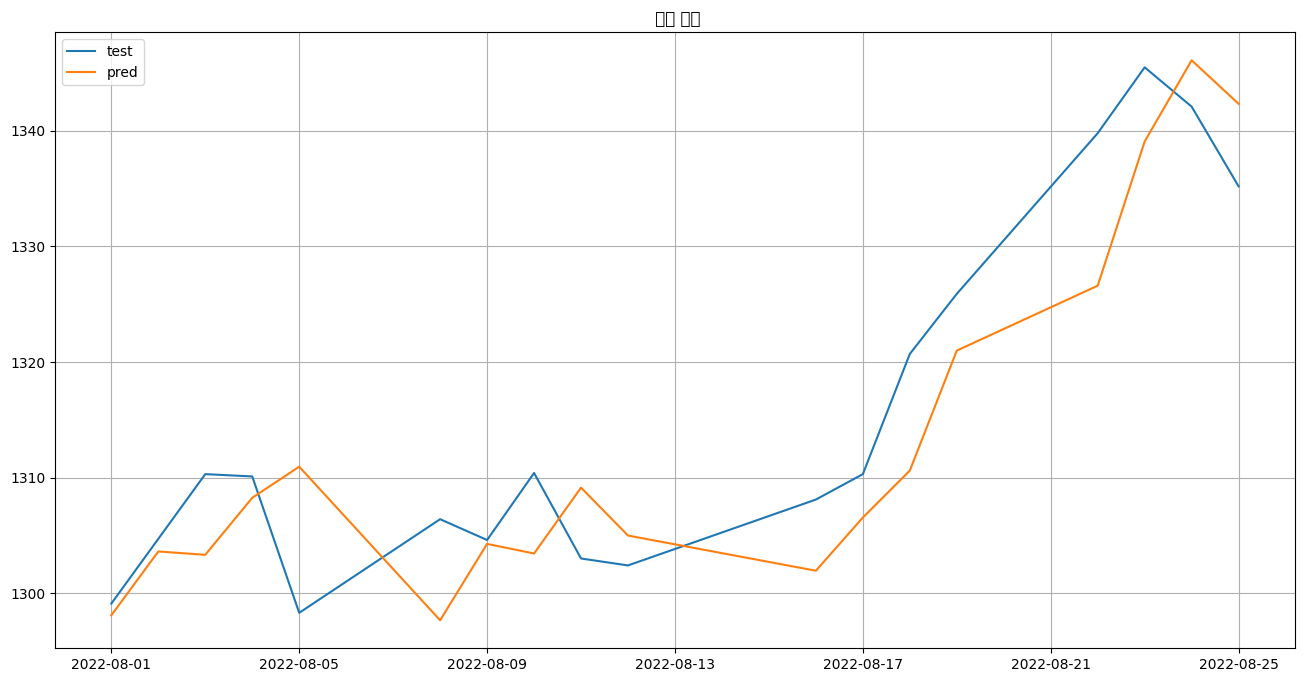

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title(' 환율 예측')
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, y_pred, label="pred")
plt.legend(loc='best')
plt.grid()
plt.show()